# Code

Bryan Steve Ortega Castillo

# 1. Setup

In [1]:
import polars as pl
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime, timedelta
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy.signal import periodogram
from scipy.ndimage import uniform_filter1d  # for smoothing

# 2. Time series generation

In [2]:
# Number of rows (time steps)
n = 100

# Generate a date range using a list comprehension (since Polars doesn't have direct date_range)
start_date = datetime(2022, 1, 1)
dates = [start_date + timedelta(days=i) for i in range(n)]

# Set a seed to make the results reproducible
np.random.seed(42)

# Generate 3 different time series data using NumPy
time_series_1 = np.random.randn(n)  # Example: Normal distribution
time_series_2 = np.random.randn(n) * 2 + 50  # Example: Shifted normal distribution
time_series_3 = np.random.rand(n) * 100  # Example: Random values between 0 and 100

# Create a Polars dataframe
df = pl.DataFrame({
    "date": dates,
    "time_series_1": time_series_1,
    "time_series_2": time_series_2,
    "time_series_3": time_series_3
})

# Show the dataframe
print(df)

shape: (100, 4)
┌─────────────────────┬───────────────┬───────────────┬───────────────┐
│ date                ┆ time_series_1 ┆ time_series_2 ┆ time_series_3 │
│ ---                 ┆ ---           ┆ ---           ┆ ---           │
│ datetime[μs]        ┆ f64           ┆ f64           ┆ f64           │
╞═════════════════════╪═══════════════╪═══════════════╪═══════════════╡
│ 2022-01-01 00:00:00 ┆ 0.496714      ┆ 47.169259     ┆ 87.737307     │
│ 2022-01-02 00:00:00 ┆ -0.138264     ┆ 49.158709     ┆ 74.076862     │
│ 2022-01-03 00:00:00 ┆ 0.647689      ┆ 49.314571     ┆ 69.701574     │
│ 2022-01-04 00:00:00 ┆ 1.52303       ┆ 48.395445     ┆ 70.248408     │
│ 2022-01-05 00:00:00 ┆ -0.234153     ┆ 49.677429     ┆ 35.949115     │
│ …                   ┆ …             ┆ …             ┆ …             │
│ 2022-04-06 00:00:00 ┆ -1.463515     ┆ 50.770635     ┆ 57.547418     │
│ 2022-04-07 00:00:00 ┆ 0.29612       ┆ 48.232285     ┆ 38.816993     │
│ 2022-04-08 00:00:00 ┆ 0.261055      ┆ 50.30745

# 3. Plotting the time series

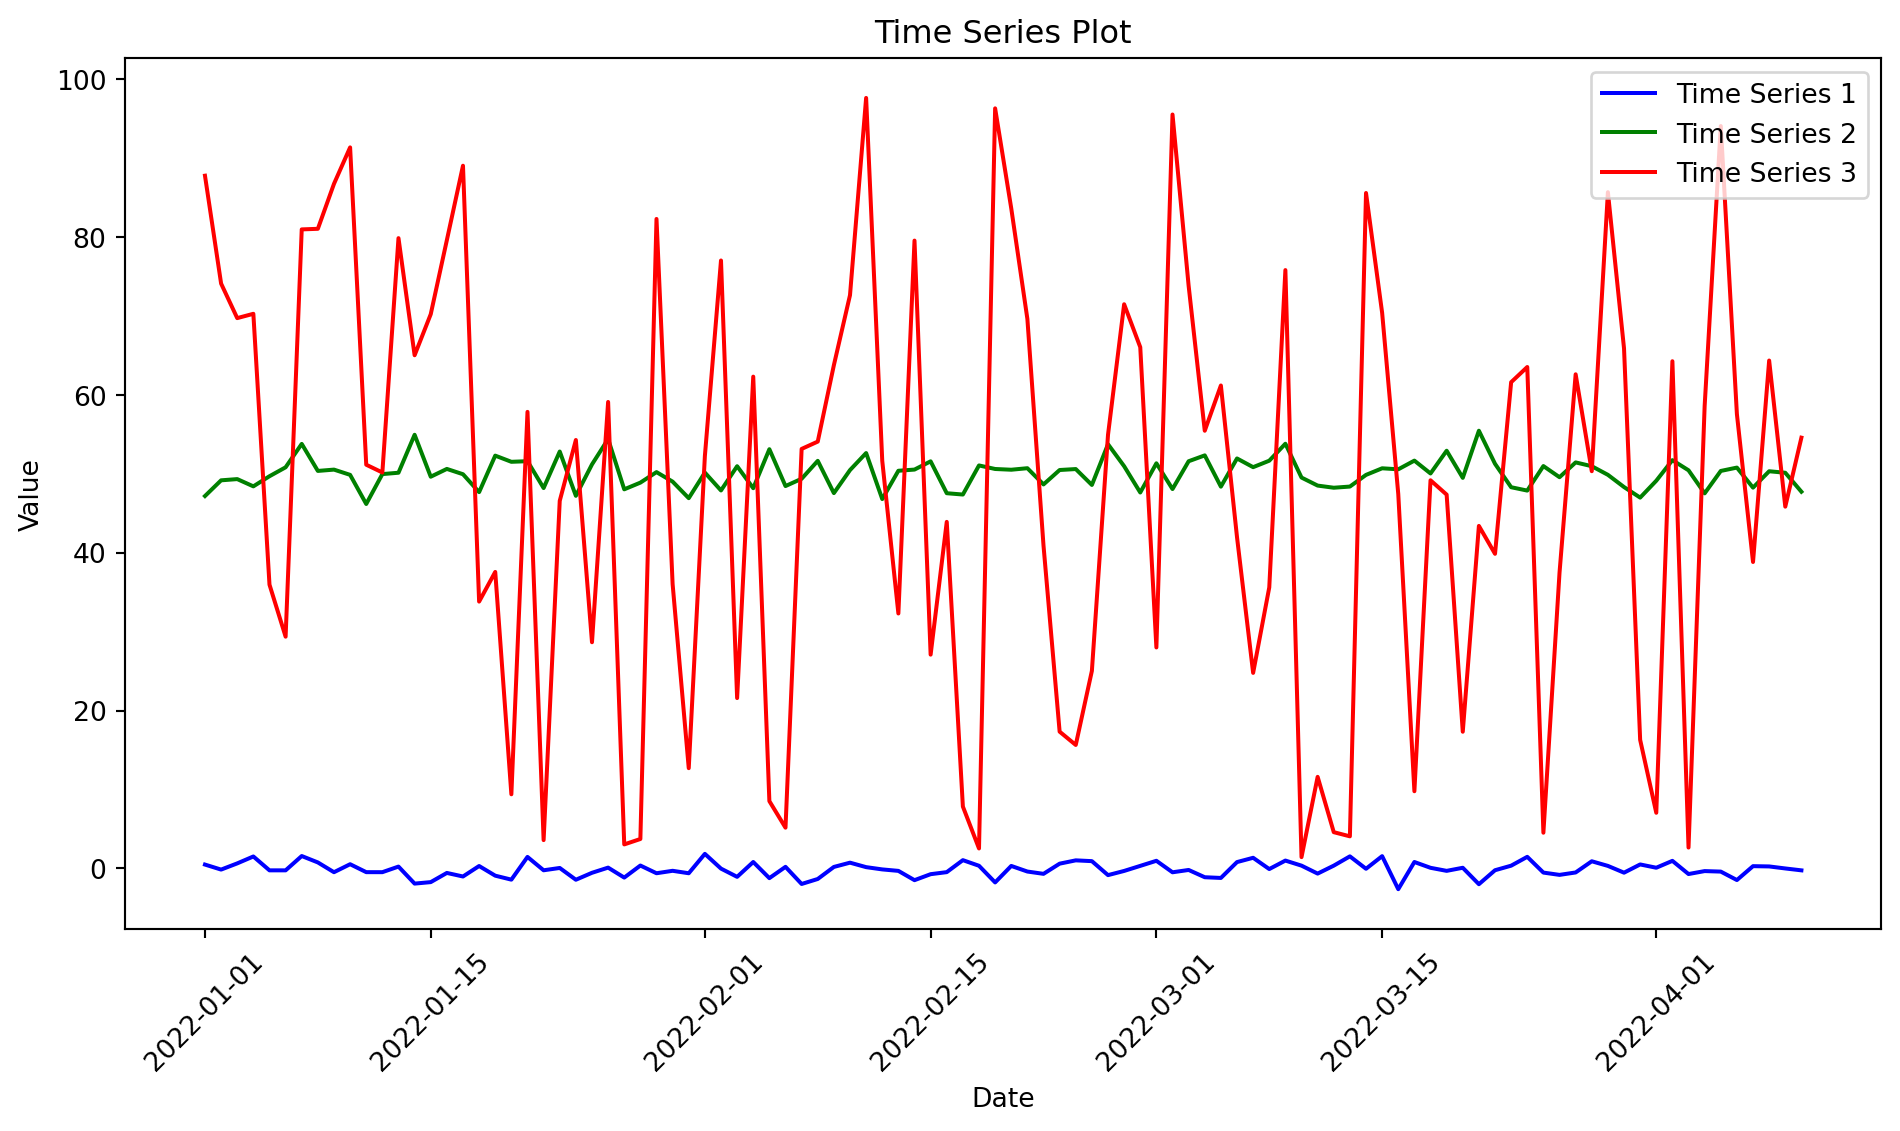

In [3]:
# Extract the data from the Polars dataframe
dates = df["date"].to_list()
time_series_1 = df["time_series_1"].to_list()
time_series_2 = df["time_series_2"].to_list()
time_series_3 = df["time_series_3"].to_list()

# Create the plot
plt.figure(figsize=(10, 6))

# Plot each time series
plt.plot(dates, time_series_1, label="Time Series 1", color='b')
plt.plot(dates, time_series_2, label="Time Series 2", color='g')
plt.plot(dates, time_series_3, label="Time Series 3", color='r')

# Add title and labels
plt.title("Time Series Plot")
plt.xlabel("Date")
plt.ylabel("Value")

# Add legend
plt.legend()

# Rotate date labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

# 4. Autocorrelation functions

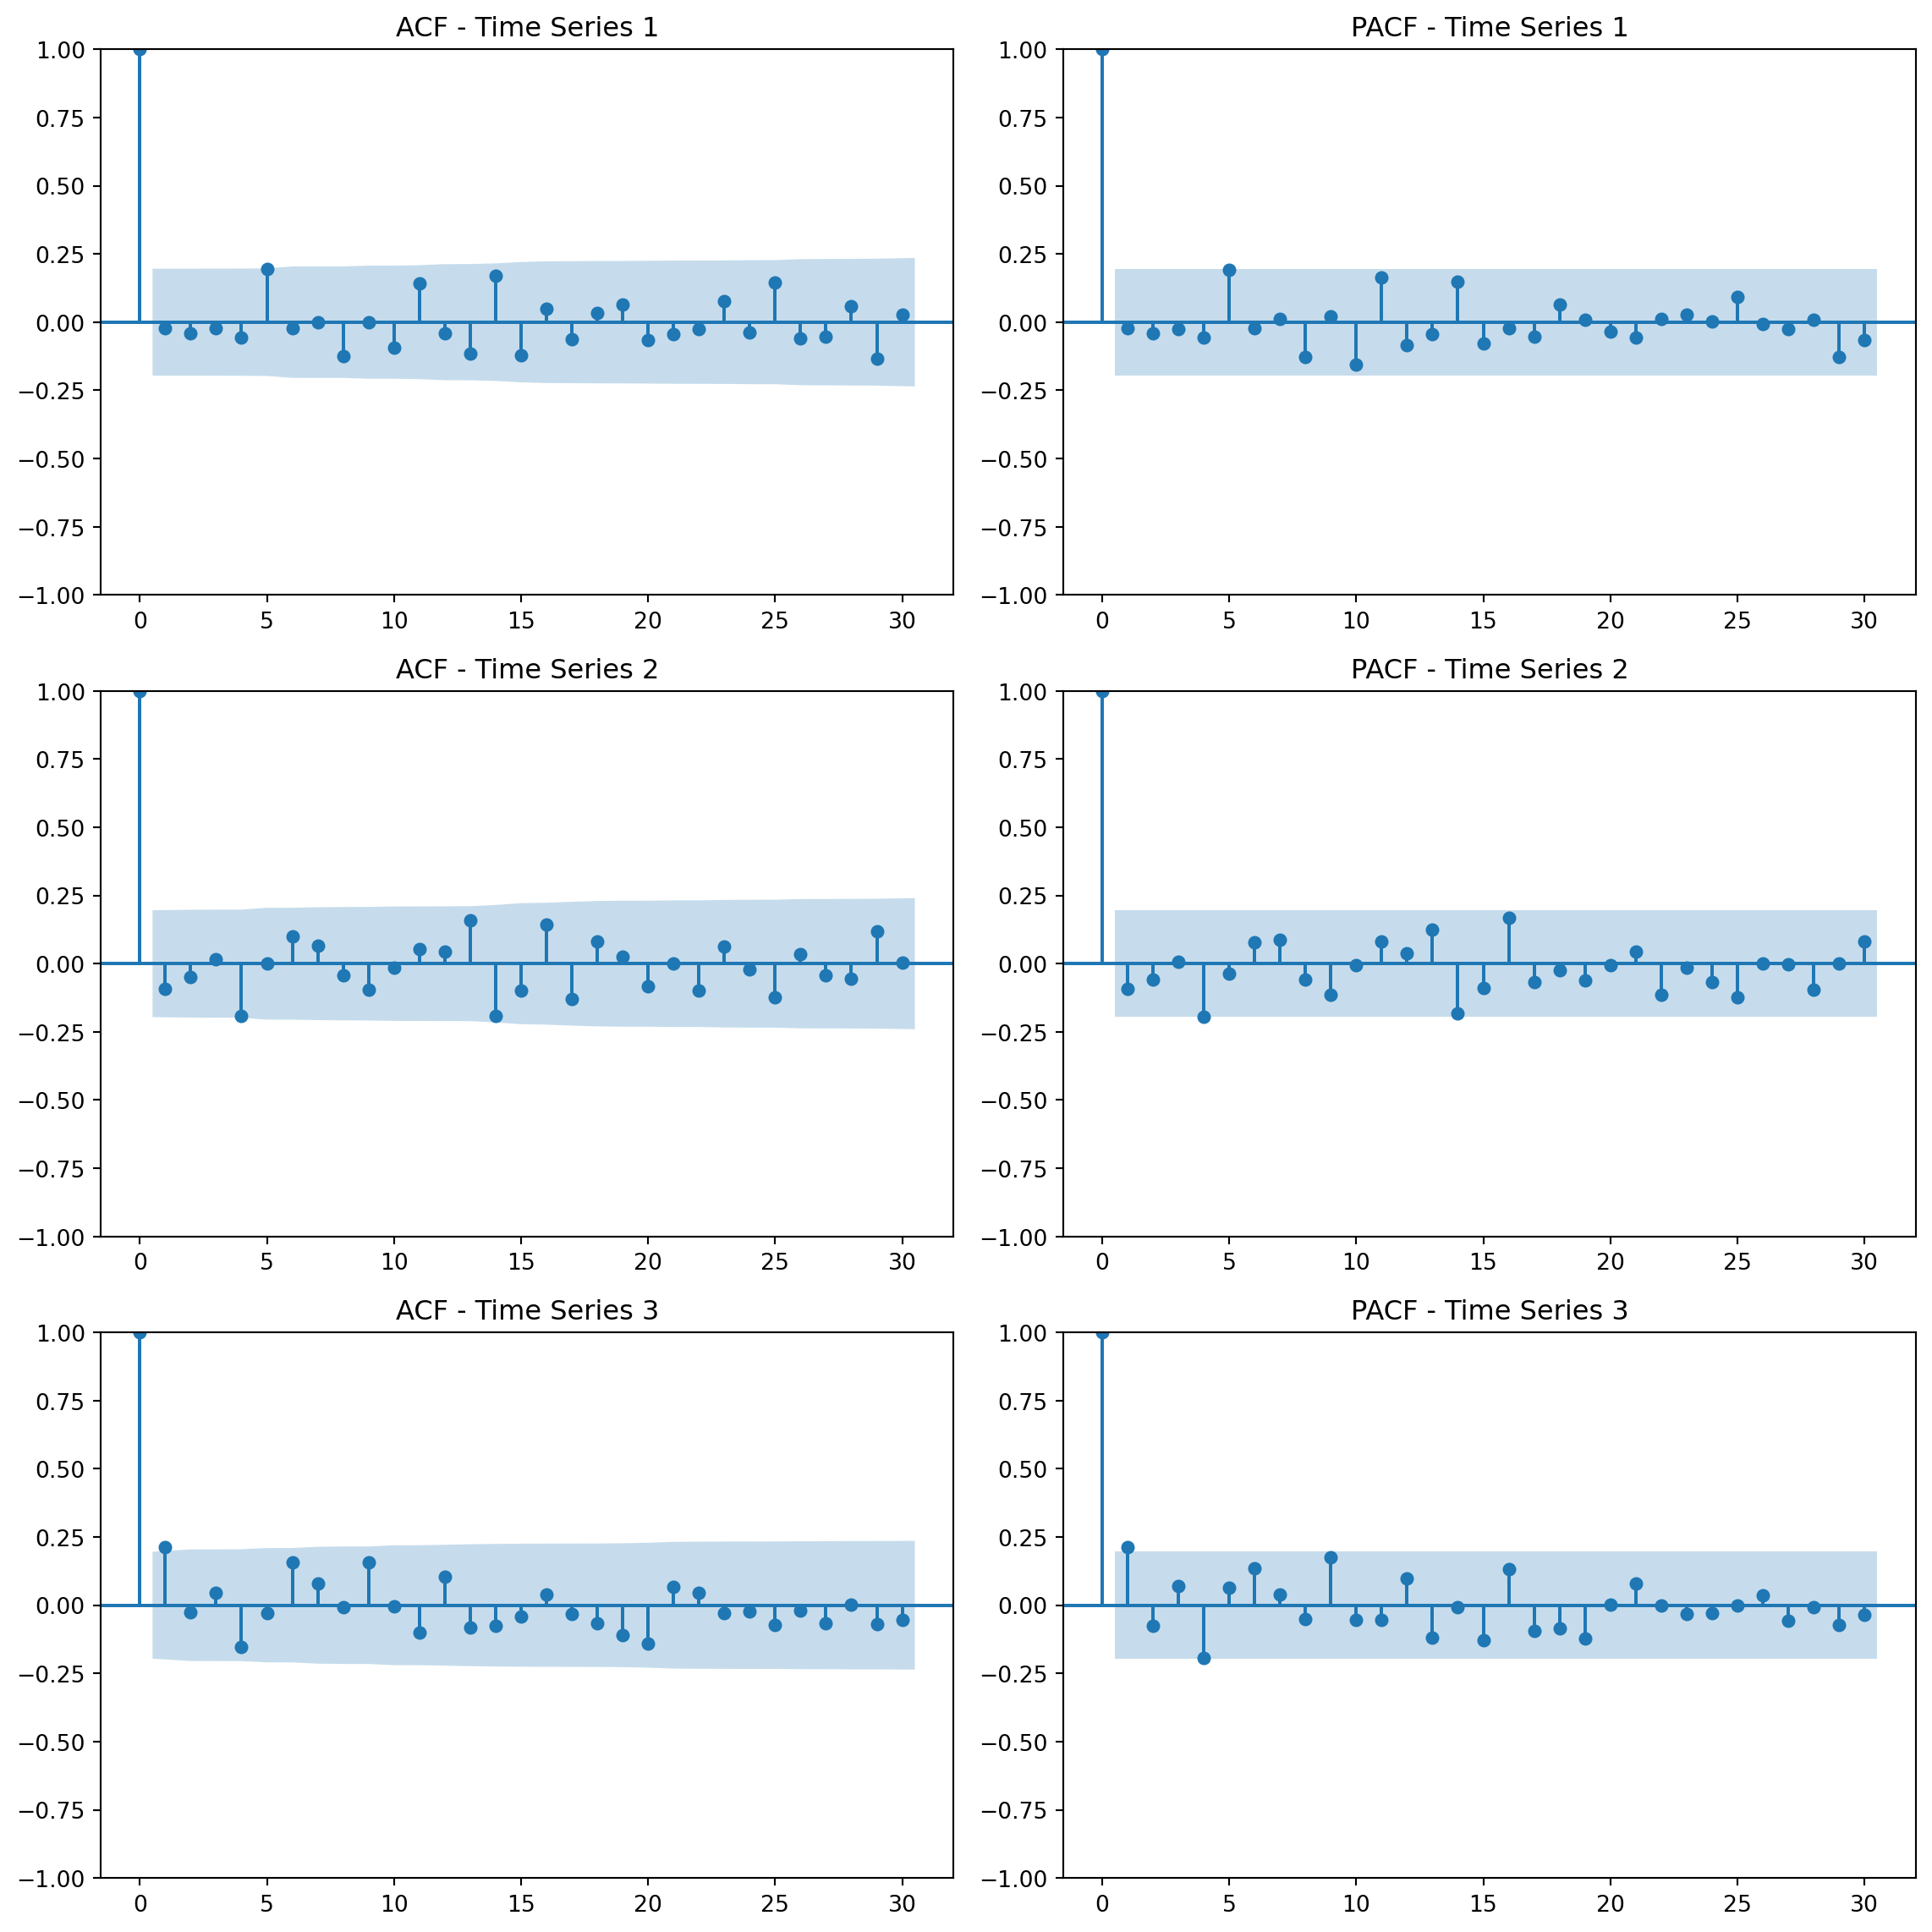

In [4]:
# Extract the time series data from the Polars dataframe
time_series_1 = df["time_series_1"].to_list()
time_series_2 = df["time_series_2"].to_list()
time_series_3 = df["time_series_3"].to_list()

# Set up subplots for ACF and PACF of each time series
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

# Plot ACF and PACF for Time Series 1
plot_acf(time_series_1, ax=axes[0, 0], lags=30)
axes[0, 0].set_title("ACF - Time Series 1")
plot_pacf(time_series_1, ax=axes[0, 1], lags=30)
axes[0, 1].set_title("PACF - Time Series 1")

# Plot ACF and PACF for Time Series 2
plot_acf(time_series_2, ax=axes[1, 0], lags=30)
axes[1, 0].set_title("ACF - Time Series 2")
plot_pacf(time_series_2, ax=axes[1, 1], lags=30)
axes[1, 1].set_title("PACF - Time Series 2")

# Plot ACF and PACF for Time Series 3
plot_acf(time_series_3, ax=axes[2, 0], lags=30)
axes[2, 0].set_title("ACF - Time Series 3")
plot_pacf(time_series_3, ax=axes[2, 1], lags=30)
axes[2, 1].set_title("PACF - Time Series 3")

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

# 5. Spectral Analysis

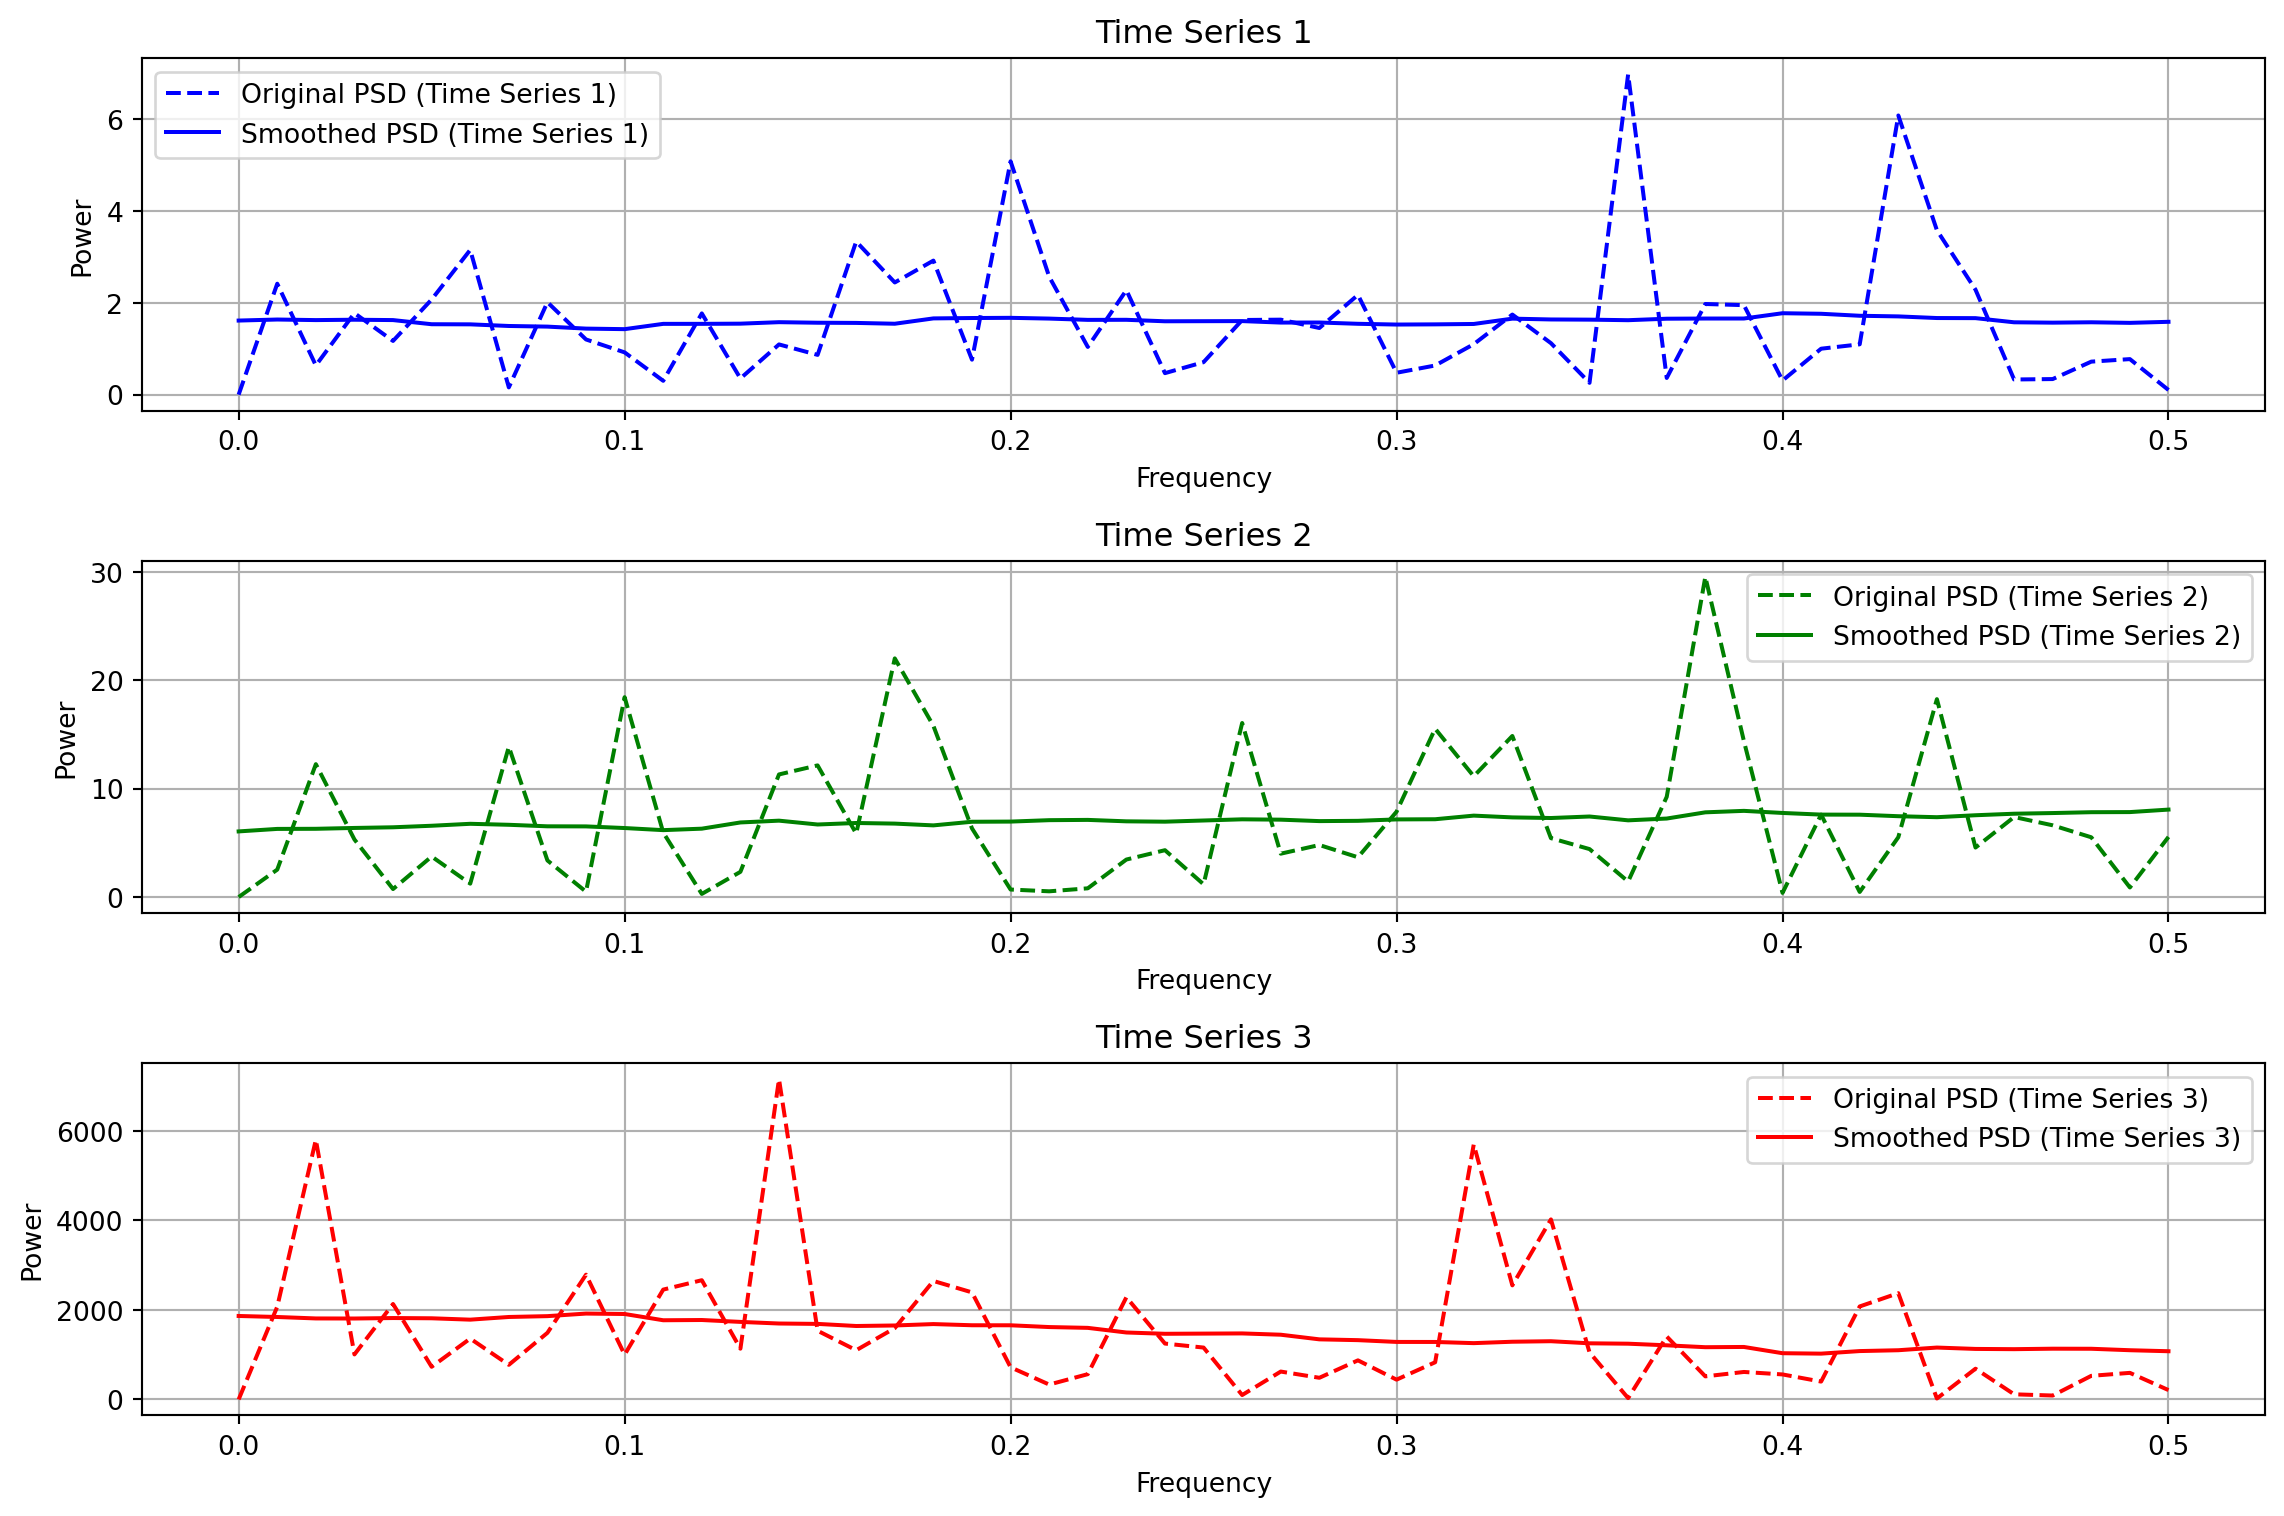

In [5]:
# Function to compute the original and smoothed PSD
def compute_spectrum(time_series, span=51):
    # Perform spectral analysis using periodogram
    frequencies, psd = periodogram(time_series)
    
    # Smooth the PSD if needed
    smoothed_psd = uniform_filter1d(psd, size=span)
    
    return frequencies, psd, smoothed_psd

# Compute PSD for each time series (original and smoothed)
frequencies_1, psd_1, smoothed_psd_1 = compute_spectrum(time_series_1)
frequencies_2, psd_2, smoothed_psd_2 = compute_spectrum(time_series_2)
frequencies_3, psd_3, smoothed_psd_3 = compute_spectrum(time_series_3)

# Plot the results
plt.figure(figsize=(12, 8))

# Plot for Time Series 1
plt.subplot(3, 1, 1)
plt.plot(frequencies_1, psd_1, label="Original PSD (Time Series 1)", color='b', linestyle='--')
plt.plot(frequencies_1, smoothed_psd_1, label="Smoothed PSD (Time Series 1)", color='b')
plt.title('Time Series 1')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.legend()
plt.grid(True)

# Plot for Time Series 2
plt.subplot(3, 1, 2)
plt.plot(frequencies_2, psd_2, label="Original PSD (Time Series 2)", color='g', linestyle='--')
plt.plot(frequencies_2, smoothed_psd_2, label="Smoothed PSD (Time Series 2)", color='g')
plt.title('Time Series 2')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.legend()
plt.grid(True)

# Plot for Time Series 3
plt.subplot(3, 1, 3)
plt.plot(frequencies_3, psd_3, label="Original PSD (Time Series 3)", color='r', linestyle='--')
plt.plot(frequencies_3, smoothed_psd_3, label="Smoothed PSD (Time Series 3)", color='r')
plt.title('Time Series 3')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.legend()
plt.grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()